In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [33]:
sns.set_style('darkgrid')
df = pd.read_csv('data/StudentsPerformance.csv')
df.shape

(1000, 8)

In [6]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [34]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [35]:
from sklearn.preprocessing import  LabelEncoder

lc = LabelEncoder();
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])

gender
0    518
1    482
Name: count, dtype: int64


<Axes: xlabel='gender', ylabel='count'>

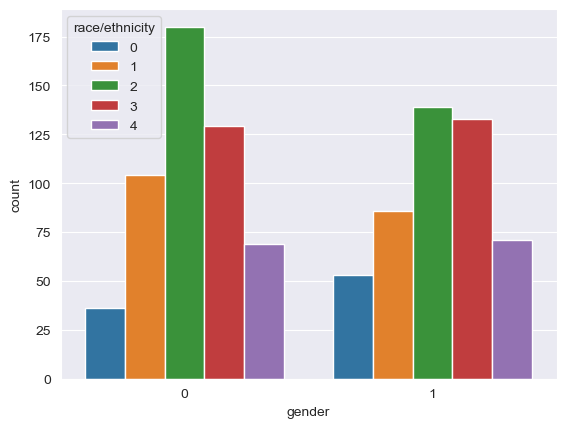

In [16]:
print(df['gender'].value_counts())
sns.countplot(x='gender', data=df,hue='race/ethnicity')

In [17]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
mean score                     0
dtype: int64

([<matplotlib.patches.Wedge at 0x1d231eb1430>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'None'),
  Text(0.4746018041084478, -0.9923472817199666, 'Completed')])

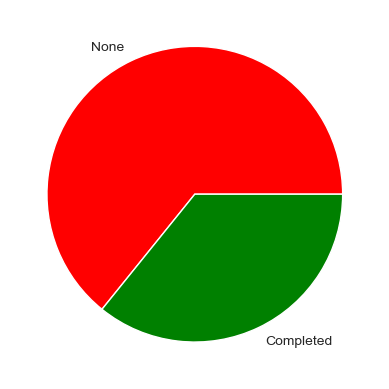

In [18]:
labels = ['None', 'Completed']
colors = ['red', 'green']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

<Axes: xlabel='parental level of education', ylabel='mean score'>

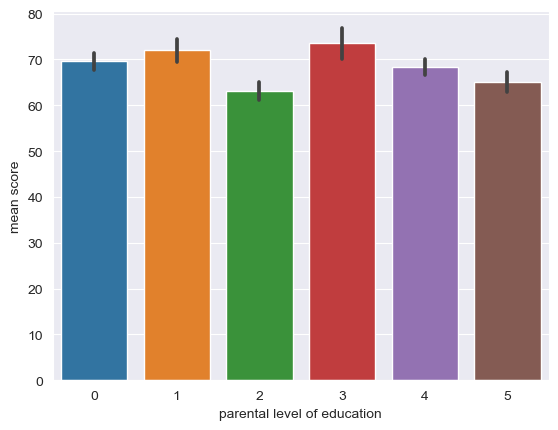

In [19]:
sns.barplot(x = 'parental level of education', y = 'mean score', data = df)

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


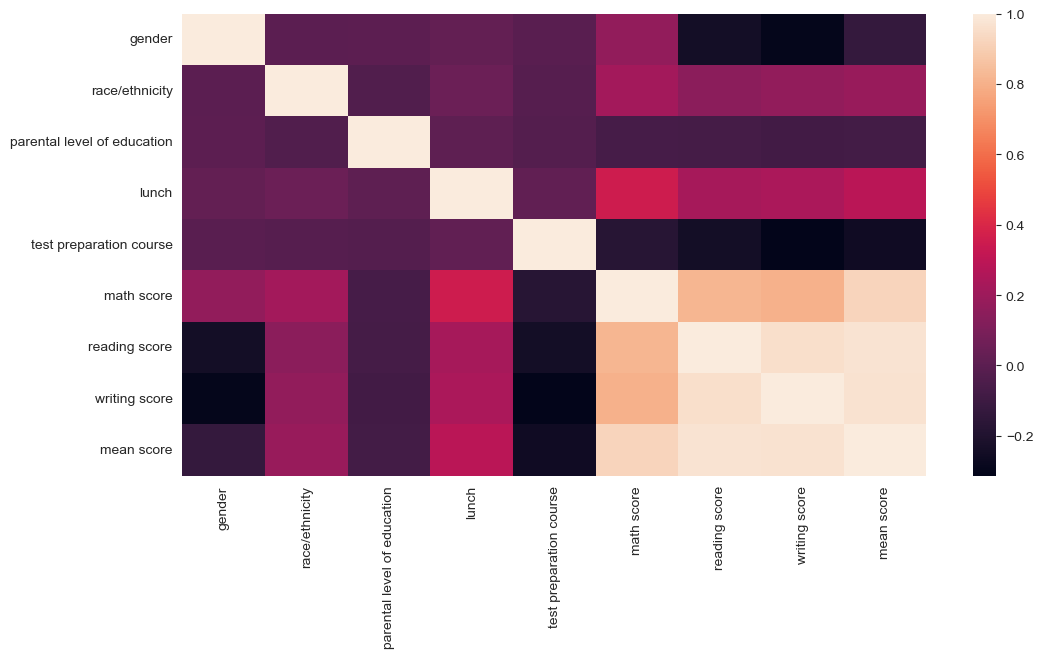

In [22]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [23]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [24]:
y = df['mean score']
x = df.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [25]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [26]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [30]:
y_pred = model.predict(x_test)

In [31]:
from sklearn.metrics import accuracy_score
score =accuracy_score(y_test,y_pred)
print(score)

0.025
